In [1]:
# importing Dependencies 
import time
import os
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
from functools import reduce
from scipy.stats import linregress 

In [2]:
# importing csv for internal combusion engine cars to create dataframe
ice_df=pd.read_csv("Resources/Edmunds.csv")
#displaying 1st 5 rows of internal combusiton engine cars dataframe
display(ice_df.head())
# importing csv for hybrid carsto create dataframe
hybrid_df=pd.read_csv("Resources/Edmunds_hybrid.csv")
#displaying 1st 5 rows of hybrid cars dataframe
display(hybrid_df.head())
# importing csv for electric cars to create dataframe
ev_df=pd.read_csv("Resources/Edmunds_ev.csv")
#displaying 1st 5 rows of electric cars dataframe
display(ev_df.head())

,info,year 1,year 2,year 3,year 4,year 5,model year,model,engine,cost
0,Insurance,1544,1598,1654,1712,1772,2023,Acura 2023 TLX Sedan 4dr Sedan AWD w/Advance P...,2.0L 4cyl Turbo 10A,53096
1,Maintenance,86,440,386,2465,2049,2023,Acura 2023 TLX Sedan 4dr Sedan AWD w/Advance P...,2.0L 4cyl Turbo 10A,53096
2,Repairs,0,0,0,462,707,2023,Acura 2023 TLX Sedan 4dr Sedan AWD w/Advance P...,2.0L 4cyl Turbo 10A,53096
3,Taxes_Fees,3347,239,214,194,194,2023,Acura 2023 TLX Sedan 4dr Sedan AWD w/Advance P...,2.0L 4cyl Turbo 10A,53096
4,Financing,4197,3421,2566,1628,597,2023,Acura 2023 TLX Sedan 4dr Sedan AWD w/Advance P...,2.0L 4cyl Turbo 10A,53096


,info,year 1,year 2,year 3,year 4,year 5,model year,model,engine,cost
0,Insurance,1452,1503,1555,1610,1666,2023,Audi A3 Premium 4dr Sedan AWD w/40 TFSI,2.0L 4cyl Turbo gas/electric mild hybrid 7AM,39413
1,Maintenance,273,953,904,2173,1183,2023,Audi A3 Premium 4dr Sedan AWD w/40 TFSI,2.0L 4cyl Turbo gas/electric mild hybrid 7AM,39413
2,Repairs,0,0,0,858,1310,2023,Audi A3 Premium 4dr Sedan AWD w/40 TFSI,2.0L 4cyl Turbo gas/electric mild hybrid 7AM,39413
3,Taxes_Fees,2646,188,169,153,153,2023,Audi A3 Premium 4dr Sedan AWD w/40 TFSI,2.0L 4cyl Turbo gas/electric mild hybrid 7AM,39413
4,Financing,3117,2541,1906,1209,443,2023,Audi A3 Premium 4dr Sedan AWD w/40 TFSI,2.0L 4cyl Turbo gas/electric mild hybrid 7AM,39413


,info,year 1,year 2,year 3,year 4,year 5,model year,model,engine,cost
0,Insurance,1763,1825,1889,1955,2023,2023,Audi e-tron Chronos Edition 4dr SUV AWD,electric DD,88473
1,Maintenance,185,772,413,3544,1690,2023,Audi e-tron Chronos Edition 4dr SUV AWD,electric DD,88473
2,Repairs,0,0,0,801,1223,2023,Audi e-tron Chronos Edition 4dr SUV AWD,electric DD,88473
3,Taxes_Fees,5574,398,356,323,323,2023,Audi e-tron Chronos Edition 4dr SUV AWD,electric DD,88473
4,Financing,6998,5703,4279,2714,994,2023,Audi e-tron Chronos Edition 4dr SUV AWD,electric DD,88473


In [3]:
#addingin column with type for easier sorting
ice_df['type']='internal combustion'
hybrid_df['type']='hybrid'
ev_df['type']='electric'

In [4]:
#distribution of the range of cost for the cars in the data frames based on engine type
display(f'cost to buy internal combustion engine cars: max = ${ice_df["cost"].max()}, min=${ice_df["cost"].min()}, mean=${round(ice_df["cost"].mean(),2)}')
display(f'cost to buy hybrid cars: max = ${hybrid_df["cost"].max()}, min=${hybrid_df["cost"].min()}, mean=${round(hybrid_df["cost"].mean(),2)}')
display(f'cost to buy all electric cars: max = ${ev_df["cost"].max()}, min=${ev_df["cost"].min()}, mean=${round(ev_df["cost"].mean(),2)}')

'cost to buy internal combustion engine cars: max = $272287, min=$25998, mean=$64442.52'

'cost to buy hybrid cars: max = $147655, min=$13489, mean=$63504.79'

'cost to buy all electric cars: max = $112924, min=$30119, mean=$62339.56'

In [5]:
# limiting price range of cars for all the engine types for more accurate comparison
# the highest least expensive price for the 3 dataframes
least=26000
# lowest most expensive price for the 3 dataframes
most=113000
# removing most and least expensive cars from analysis for a more fair comparison
reduced_ice_df = ice_df[(ice_df["cost"]>least) & (ice_df["cost"]<most)]
reduced_hybrid_df = hybrid_df[(hybrid_df["cost"]>least) & (hybrid_df["cost"]<most)]
reduced_ev_df = ev_df[(ev_df["cost"]>least)& (ev_df["cost"]<most)]
# concatinating data frames of different engine types into a single dataframe
ice_hybrid_ev_df=pd.concat((reduced_ice_df, reduced_hybrid_df, reduced_ev_df))
# displaying 1st 5 rows of combined dataframe
ice_hybrid_ev_df.tail()

,info,year 1,year 2,year 3,year 4,year 5,model year,model,engine,cost,type
345,Repairs,0,0,0,357,545,2023,Volkswagen ID.4 Standard 4dr SUV,electric DD,39993,electric
346,Taxes_Fees,2525,180,161,146,146,2023,Volkswagen ID.4 Standard 4dr SUV,electric DD,39993,electric
347,Financing,3163,2578,1934,1227,450,2023,Volkswagen ID.4 Standard 4dr SUV,electric DD,39993,electric
348,Depreciation,14139,1969,1865,2187,2072,2023,Volkswagen ID.4 Standard 4dr SUV,electric DD,39993,electric
349,Fuel,874,900,927,955,983,2023,Volkswagen ID.4 Standard 4dr SUV,electric DD,39993,electric


the following code is written to calculate how much it cost for the seven breakdown items from the Edmunds database assuming that a typical person drives 15,000 miles.

In [6]:
# calculating the cost per mile 
for i in range(5):
    # creating search string
    text = "year "+ str(i+1)
    # calculating cost/ 15,000 miles for each break down cost item, model and engine type
    ice_hybrid_ev_df['cost/mile ('+text+ ')']=round(ice_hybrid_ev_df[text]/15000,2)
# displaying 1st 5 rows of df to verify addition
ice_hybrid_ev_df.head()

,info,year 1,year 2,year 3,year 4,year 5,model year,model,engine,cost,type,cost/mile (year 1),cost/mile (year 2),cost/mile (year 3),cost/mile (year 4),cost/mile (year 5)
0,Insurance,1544,1598,1654,1712,1772,2023,Acura 2023 TLX Sedan 4dr Sedan AWD w/Advance P...,2.0L 4cyl Turbo 10A,53096,internal combustion,0.10,0.11,0.11,0.11,0.12
1,Maintenance,86,440,386,2465,2049,2023,Acura 2023 TLX Sedan 4dr Sedan AWD w/Advance P...,2.0L 4cyl Turbo 10A,53096,internal combustion,0.01,0.03,0.03,0.16,0.14
2,Repairs,0,0,0,462,707,2023,Acura 2023 TLX Sedan 4dr Sedan AWD w/Advance P...,2.0L 4cyl Turbo 10A,53096,internal combustion,0.00,0.00,0.00,0.03,0.05
3,Taxes_Fees,3347,239,214,194,194,2023,Acura 2023 TLX Sedan 4dr Sedan AWD w/Advance P...,2.0L 4cyl Turbo 10A,53096,internal combustion,0.22,0.02,0.01,0.01,0.01
4,Financing,4197,3421,2566,1628,597,2023,Acura 2023 TLX Sedan 4dr Sedan AWD w/Advance P...,2.0L 4cyl Turbo 10A,53096,internal combustion,0.28,0.23,0.17,0.11,0.04


In [7]:
# creating dataframe to pull out the cost/mile and dropping the yearly cost
yearly_cost=ice_hybrid_ev_df[["model",'engine','cost','type','info','cost/mile (year 1)','cost/mile (year 2)',
                             'cost/mile (year 3)','cost/mile (year 4)','cost/mile (year 5)']]
# setting index to model, engine and cost
yearly_cost.set_index(["model",'engine','cost'], inplace=True)

In [8]:
# calculating the mean based on the engine type and break down cost items
yearly_cost_avg=round(yearly_cost.groupby(['info','type']).mean(numeric_only=True),2)
# reting the index
yearly_cost_avg.reset_index(inplace=True)
# renaming columns to year for plots
yearly_cost_avg.rename(columns={'cost/mile (year 1)': 'year 1', 'cost/mile (year 2)': 'year 2'
                               , 'cost/mile (year 3)': 'year 3', 'cost/mile (year 4)': 'year 4'
                               , 'cost/mile (year 5)': 'year 5'},inplace=True)
# displaying calculated values of cost/mile for the engine type and break down cost items
yearly_cost_avg

,info,type,year 1,year 2,year 3,year 4,year 5
0,Depreciation,electric,1.40,0.26,0.22,0.26,0.24
1,Depreciation,hybrid,1.07,0.34,0.27,0.31,0.27
2,Depreciation,internal combustion,0.84,0.27,0.23,0.26,0.23
3,Financing,electric,0.33,0.27,0.20,0.13,0.05
4,Financing,hybrid,0.33,0.27,0.20,0.13,0.05
5,Financing,internal combustion,0.29,0.23,0.18,0.11,0.04
6,Fuel,electric,0.06,0.07,0.07,0.07,0.07
7,Fuel,hybrid,0.17,0.18,0.18,0.19,0.19
8,Fuel,internal combustion,0.18,0.19,0.19,0.20,0.21
9,Insurance,electric,0.11,0.11,0.12,0.12,0.12


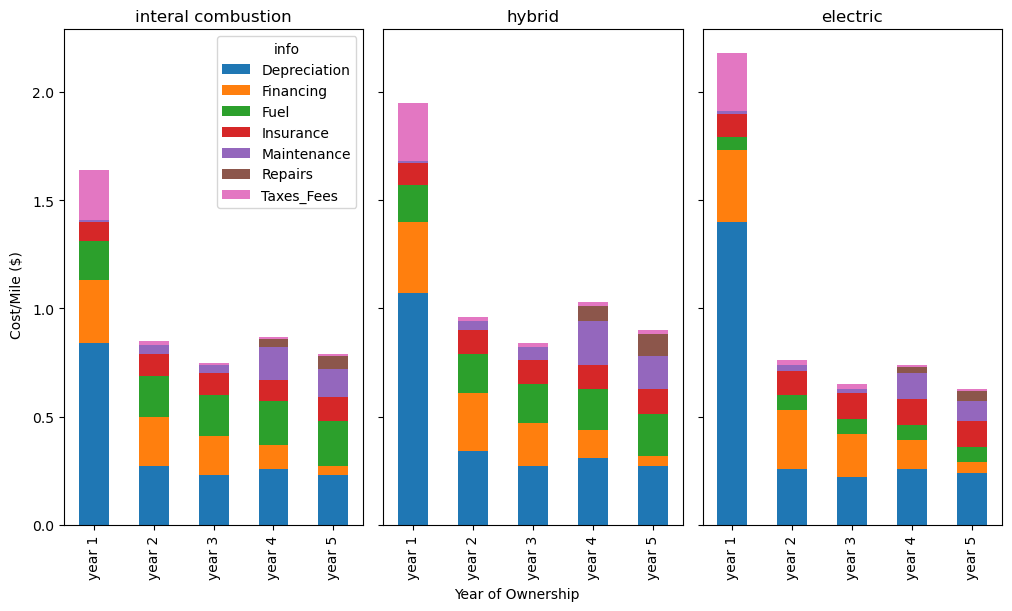

In [9]:
# creating yearly cost for internal combustion engine cars and seting index to break down cost item
ice_yearly_cost_avg=yearly_cost_avg[yearly_cost_avg['type']=='internal combustion'].set_index('info')
# deleteing type column
del ice_yearly_cost_avg['type']
# creating yearly cost for electric cars and seting index to break down cost item
ev_yearly_cost_avg=yearly_cost_avg[yearly_cost_avg['type']=='electric'].set_index('info')
# deleteing type column
del ev_yearly_cost_avg['type']
# creating yearly cost for hybrid cars and seting index to break down cost item
hybrid_yearly_cost_avg=yearly_cost_avg[yearly_cost_avg['type']=='hybrid'].set_index('info')
# deleteing type column
del hybrid_yearly_cost_avg['type']

# creating subplot
fig, axes = plt.subplots(nrows=1, ncols=3, sharey=True, figsize = (10, 6))
# transposing yearly cost/mile for internal combustion engine cars to plot verse year cost
ice_yearly_cost_avg.T.plot.bar(stacked=True,ax=axes[0], title='interal combustion')
# transposing yearly cost/mile for hybrid cars to plot verse year cost
hybrid_yearly_cost_avg.T.plot.bar(stacked=True,ax=axes[1], title='hybrid', legend=False)
# transposing yearly cost/mile for electric cars to plot verse year cost
ev_yearly_cost_avg.T.plot.bar(stacked=True,ax=axes[2], title='electric', legend=False)
# labeling x- and y-axes
fig.text(0.5,0.0, "Year of Ownership", ha="center", va="center")
fig.text(0.0,0.5, 'Cost/Mile ($)', ha="center", va="center", rotation=90)
# triming extra white spacing 
fig.tight_layout()
# updating plot
plt.show()


In [10]:
# saving figure to pdf
fig.savefig("cost_per_mile.pdf")

This section calculates the yearly percentage of each break down items to see how the distribution of each item changes over time

In [11]:
# summing the itemized break down items to find the total cost of each model
sum_df=ice_hybrid_ev_df.groupby(["model","engine",'cost',"type"]).sum()
# reseting the index
sum_df.reset_index(inplace=True)
# fixing the model year which also gets summed by 7
sum_df['model year']=sum_df['model year']/7
# displaying the 1st 2 rows of the summed dataframe
sum_df.head(2)

,model,engine,cost,type,info,year 1,year 2,year 3,year 4,year 5,model year,cost/mile (year 1),cost/mile (year 2),cost/mile (year 3),cost/mile (year 4),cost/mile (year 5)
0,Acura 2023 TLX Sedan 4dr Sedan AWD w/Advance P...,2.0L 4cyl Turbo 10A,53096,internal combustion,InsuranceMaintenanceRepairsTaxes_FeesFinancing...,25212,12465,10953,13068,11562,2023.0,1.68,0.84,0.72,0.86,0.78
1,Acura Integra 4dr Hatchback w/A-Spec and Techn...,1.5L 4cyl Turbo 6M,37996,internal combustion,InsuranceMaintenanceRepairsTaxes_FeesFinancing...,16606,8915,8028,8640,8712,2023.0,1.10,0.59,0.54,0.58,0.58


comparison of yearly cost based on car type 

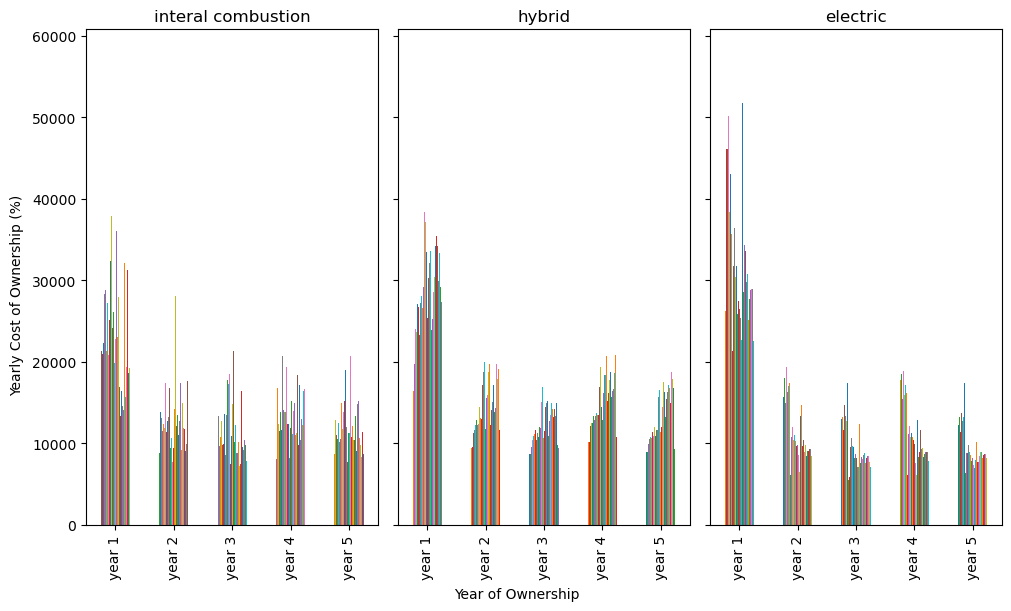

In [12]:
itemized_cost = sum_df[['year 1', 'year 2', 'year 3', 'year 4', 'year 5','type']]#.T
itemized_cost.set_index('type',inplace=True)
itemized_cost.head()

# creating subplot
fig, axes = plt.subplots(nrows=1, ncols=3, sharey=True, figsize = (10, 6))
# transposing yearly cost for internal combustion engine cars to plot verse year cost
itemized_cost_plot = itemized_cost.loc['internal combustion'].T.plot(kind='bar',legend=False,align="center", ax=axes[0], 
                                                                     title='interal combustion')
itemized_cost_plot = itemized_cost.loc['hybrid'].T.plot(kind='bar',legend=False,align="center", ax=axes[1], 
                                                                     title='hybrid')
itemized_cost_plot = itemized_cost.loc['electric'].T.plot(kind='bar',legend=False,align="center", ax=axes[2], 
                                                                     title='electric')
# labeling x- and y-axes
fig.text(0.5,0.0, "Year of Ownership", ha="center", va="center")
fig.text(0.0,0.5, 'Yearly Cost of Ownership (%)', ha="center", va="center", rotation=90)
# triming extra white spacing 
fig.tight_layout()
# updating plot
plt.show()

In [13]:
#saving plot to file
fig.savefig("YearlyCostOfOwnership.pdf")

In [14]:
# creating empty list to append  yearly cost
costlist=[] # year 1 cost
costlist1=[] # year 2 cost
costlist2=[] # year 3 cost
costlist3=[] # year 4 cost
costlist4=[] # year 5 cost
# iterating through sum dataframe to create a series of 7 entries for the total yearly cost for each model
# to be able to calculate the yearly fraction of itemized break down in order to match the number of rows in
# the orignal combined data frame ice_hybrid_ev_df
for row, column in sum_df.iterrows():
    # creatingloop through the columns
    for k in range(5,11):
        for j in range(7):
            if k == 5:
                # appending model, engine, initial cost of car, and year 1 cost to 1st list
                costlist.append((column[0],column[1],column[2],column[k]))
            elif k == 6:
                 # appending initial cost of car, and year 2 cost to 2nd list
                costlist1.append((column[2],column[k]))
            elif k == 7:
                 # appending initial cost of car, and year 3 cost to 3rd list
                costlist2.append((column[2],column[k]))
            elif k == 8:
                 # appending initial cost of car, and year 3 cost to 4th list
                costlist3.append((column[2],column[k]))
            elif k == 9:
                 # appending initial cost of car, and year 4 cost to 5th list
                costlist4.append((column[2],column[k]))
# converting list into data frames
costlist=pd.DataFrame(costlist)
costlist1=pd.DataFrame(costlist1)
costlist2=pd.DataFrame(costlist2)
costlist3=pd.DataFrame(costlist3)
costlist4=pd.DataFrame(costlist4)

In [15]:
# creating empty total cost list dataframe
total_cost_df=[]
# looping through the 1st three df list from above & merging them to add a new column with the total yearly
# expense for each vehicle 
total_cost_df=reduce(lambda df1,df2: pd.merge(df1,df2, left_index=True, right_index=True),[costlist,costlist1,costlist2])
# renaming columns
total_cost_df.rename(columns={'0_x':'model','1_x': 'engine', 3: 'total year 1', '1_y': 'total year 2', 
                              1:'total year 3'},inplace=True)
# droping repeating columns for the cost to buy the vehicles
total_cost_df.drop(columns=[0, 2,"0_y"],inplace=True)
# merging last 2 years from costlist from aove to total cost dataframe
total_cost_df=reduce(lambda df1,df2: pd.merge(df1,df2, left_index=True, right_index=True),[total_cost_df,costlist3,costlist4])
# renaming columns
total_cost_df.rename(columns={ '1_x': 'total year 4', '1_y': 'total year 5', '0_y': 'cost'},inplace=True)
# droping repeating columns for the cost to buy the vehicles
total_cost_df.drop(columns=["0_x"],inplace=True)
# displaying 1st 2 lines of total cost dataframe
total_cost_df.head(2)

,model,engine,total year 1,total year 2,total year 3,total year 4,cost,total year 5
0,Acura 2023 TLX Sedan 4dr Sedan AWD w/Advance P...,2.0L 4cyl Turbo 10A,25212,12465,10953,13068,53096,11562
1,Acura 2023 TLX Sedan 4dr Sedan AWD w/Advance P...,2.0L 4cyl Turbo 10A,25212,12465,10953,13068,53096,11562


In [16]:
# reseting index to model, engine and the cost to buy the car
total_cost_df=total_cost_df.set_index(['model','engine','cost'])
# reseting index to model, engine, info and the cost to buy the car 
ice_hybrid_ev_df=ice_hybrid_ev_df.set_index(['model','engine','cost','info'])
# displaying 1st 2 lines of total cost dataframe
ice_hybrid_ev_df.head()

year 1  \
model                                              engine              cost  info                  
Acura 2023 TLX Sedan 4dr Sedan AWD w/Advance Pa... 2.0L 4cyl Turbo 10A 53096 Insurance      1544   
                                                                             Maintenance      86   
                                                                             Repairs           0   
                                                                             Taxes_Fees     3347   
                                                                             Financing      4197   

                                                                                          year 2  \
model                                              engine              cost  info                  
Acura 2023 TLX Sedan 4dr Sedan AWD w/Advance Pa... 2.0L 4cyl Turbo 10A 53096 Insurance      1598   
                                                                             Maintenance     440   
                                                                             Repairs           0   
                                                                             Taxes_Fees      239   
                                                                             Financing      3421   

                                                                                          year 3  \
model                                              engine              cost  info                  
Acura 2023 TLX Sedan 4dr Sedan AWD w/Advance Pa... 2.0L 4cyl Turbo 10A 53096 Insurance      1654   
                                                                             Maintenance     386   
                                                                             Repairs           0   
                                                                             Taxes_Fees      214   
                                                                             Financing      2566   

                                                                                          year 4  \
model                                              engine              cost  info                  
Acura 2023 TLX Sedan 4dr Sedan AWD w/Advance Pa... 2.0L 4cyl Turbo 10A 53096 Insurance      1712   
                                                                             Maintenance    2465   
                                                                             Repairs         462   
                                                                             Taxes_Fees      194   
                                                                             Financing      1628   

                                                                                          year 5  \
model                                              engine              cost  info                  
Acura 2023 TLX Sedan 4dr Sedan AWD w/Advance Pa... 2.0L 4cyl Turbo 10A 53096 Insurance      1772   
                                                                             Maintenance    2049   
                                                                             Repairs         707   
                                                                             Taxes_Fees      194   
                                                                             Financing       597   

                                                                                          model year  \
model                                              engine              cost  info                      
Acura 2023 TLX Sedan 4dr Sedan AWD w/Advance Pa... 2.0L 4cyl Turbo 10A 53096 Insurance          2023   
                                                                             Maintenance        2023   
                                                                             Repairs            2023   
                                                                 

In [17]:
# merging  ice_hybrid_ev_df with total_cost_df
total_cost_df=ice_hybrid_ev_df.merge(total_cost_df,left_index=True, right_index=True)
# droping duplicate rows
total_cost_df=total_cost_df.drop_duplicates()
# reseting index
total_cost_df.reset_index(inplace=True)
# displaying 1st 5 lines of total cost dataframe
total_cost_df.head()

,model,engine,cost,info,year 1,year 2,year 3,year 4,year 5,model year,...,cost/mile (year 1),cost/mile (year 2),cost/mile (year 3),cost/mile (year 4),cost/mile (year 5),total year 1,total year 2,total year 3,total year 4,total year 5
0,Acura 2023 TLX Sedan 4dr Sedan AWD w/Advance P...,2.0L 4cyl Turbo 10A,53096,Insurance,1544,1598,1654,1712,1772,2023,...,0.10,0.11,0.11,0.11,0.12,25212,12465,10953,13068,11562
1,Acura 2023 TLX Sedan 4dr Sedan AWD w/Advance P...,2.0L 4cyl Turbo 10A,53096,Maintenance,86,440,386,2465,2049,2023,...,0.01,0.03,0.03,0.16,0.14,25212,12465,10953,13068,11562
2,Acura 2023 TLX Sedan 4dr Sedan AWD w/Advance P...,2.0L 4cyl Turbo 10A,53096,Repairs,0,0,0,462,707,2023,...,0.00,0.00,0.00,0.03,0.05,25212,12465,10953,13068,11562
3,Acura 2023 TLX Sedan 4dr Sedan AWD w/Advance P...,2.0L 4cyl Turbo 10A,53096,Taxes_Fees,3347,239,214,194,194,2023,...,0.22,0.02,0.01,0.01,0.01,25212,12465,10953,13068,11562
4,Acura 2023 TLX Sedan 4dr Sedan AWD w/Advance P...,2.0L 4cyl Turbo 10A,53096,Financing,4197,3421,2566,1628,597,2023,...,0.28,0.23,0.17,0.11,0.04,25212,12465,10953,13068,11562


In [18]:
# looping through the 5 yearly columns
for i in range(5):
    # creating string containing year
    text = 'year ' + str(i+1)
    # crating yearly fraction for itemized cost for each vehicle
    total_cost_df[text+" (ratio)"]=round(total_cost_df[text]/total_cost_df["total "+ text]*100,2)
# reseting index to the column type
total_cost_df=total_cost_df.set_index('type')
# printing 1st 2 rows of the dataframe
total_cost_df.head(2)

,model,engine,cost,info,year 1,year 2,year 3,year 4,year 5,model year,...,total year 1,total year 2,total year 3,total year 4,total year 5,year 1 (ratio),year 2 (ratio),year 3 (ratio),year 4 (ratio),year 5 (ratio)
type,,,,,,,,,,,,,,,,,,,,,
internal combustion,Acura 2023 TLX Sedan 4dr Sedan AWD w/Advance P...,2.0L 4cyl Turbo 10A,53096,Insurance,1544,1598,1654,1712,1772,2023,...,25212,12465,10953,13068,11562,6.12,12.82,15.10,13.10,15.33
internal combustion,Acura 2023 TLX Sedan 4dr Sedan AWD w/Advance P...,2.0L 4cyl Turbo 10A,53096,Maintenance,86,440,386,2465,2049,2023,...,25212,12465,10953,13068,11562,0.34,3.53,3.52,18.86,17.72


In [19]:
# creating total cost for internal combustion engine vechiles dataframe
total_ice_cost_plot=total_cost_df.loc["internal combustion"]
# reducing the dataframe to contain only the itemized cost and the calculated fraction for the yearly cost
total_ice_cost_plot=total_ice_cost_plot[['info',"year 1 (ratio)","year 2 (ratio)","year 3 (ratio)","year 4 (ratio)","year 5 (ratio)"]]
# reseting index to row number
total_ice_cost_plot.reset_index(inplace=True)
# deleting the column type
del total_ice_cost_plot['type']
# renaming columns
total_ice_cost_plot.rename(columns={"year 1 (ratio)" : 'year 1',"year 2 (ratio)" : 'year 2',
                                       "year 3 (ratio)" : 'year 3',"year 4 (ratio)": 'year 4',
                                       "year 5 (ratio)": 'year 5'},inplace=True)

# creating total cost for hybrid vechiles dataframe
total_hybrid_cost_plot=total_cost_df.loc["hybrid"]
# reducing the dataframe to contain only the itemized cost and the calculated fraction for the yearly cost
total_hybrid_cost_plot=total_hybrid_cost_plot[['info',"year 1 (ratio)","year 2 (ratio)","year 3 (ratio)","year 4 (ratio)","year 5 (ratio)"]]
# reseting index to row number
total_hybrid_cost_plot.reset_index(inplace=True)
# deleting the column type
del total_hybrid_cost_plot['type']
# renaming columns
total_hybrid_cost_plot.rename(columns={"year 1 (ratio)" : 'year 1',"year 2 (ratio)" : 'year 2',
                                       "year 3 (ratio)" : 'year 3',"year 4 (ratio)": 'year 4',
                                       "year 5 (ratio)": 'year 5'},inplace=True)
                                       
# creating total cost for electric vechiles dataframe
total_ev_cost_plot=total_cost_df.loc["electric"]
# reducing the dataframe to contain only the itemized cost and the calculated fraction for the yearly cost
total_ev_cost_plot=total_ev_cost_plot[['info',"year 1 (ratio)","year 2 (ratio)","year 3 (ratio)","year 4 (ratio)","year 5 (ratio)"]]
# reseting index to row number
total_ev_cost_plot.reset_index(inplace=True)
# deleting the column type
del total_ev_cost_plot['type']
# renaming columns
total_ev_cost_plot.rename(columns={"year 1 (ratio)" : 'year 1',"year 2 (ratio)" : 'year 2',
                                       "year 3 (ratio)" : 'year 3',"year 4 (ratio)": 'year 4',
                                       "year 5 (ratio)": 'year 5'},inplace=True)

# printing 1st 2 rows of the dataframe
total_ev_cost_plot.head(2)

,info,year 1,year 2,year 3,year 4,year 5
0,Insurance,3.29,11.61,14.60,12.26,16.53
1,Maintenance,0.35,4.91,3.19,22.22,13.81


In [20]:
# determination of the mean of each engine type for the yearly itemized cost 
# grouping of the internal combustion engine cars by itemized cost and transposing df
total_ice_cost_plot=total_ice_cost_plot.groupby('info').mean().T
# grouping of the hybrid cars by itemized cost and transposing df
total_hybrid_cost_plot=total_hybrid_cost_plot.groupby('info').mean().T
# grouping of the electric cars by itemized cost and transposing df
total_ev_cost_plot=total_ev_cost_plot.groupby('info').mean().T
# printing dataframe of the internal combustion engine cars to screen
total_ice_cost_plot

info,Depreciation,Financing,Fuel,Insurance,Maintenance,Repairs,Taxes_Fees
year 1,49.795024,17.361053,11.611196,6.091675,0.937177,0.000000,14.204019
year 2,30.626124,27.489091,22.956268,12.217560,4.759522,0.000000,1.950431
year 3,29.179952,22.921914,26.213254,13.998660,5.112105,0.632632,1.941148
year 4,28.393732,12.441196,23.103828,12.369809,17.589904,4.594880,1.506651
year 5,28.518804,5.088469,26.310191,14.178086,16.499809,7.723636,1.681722


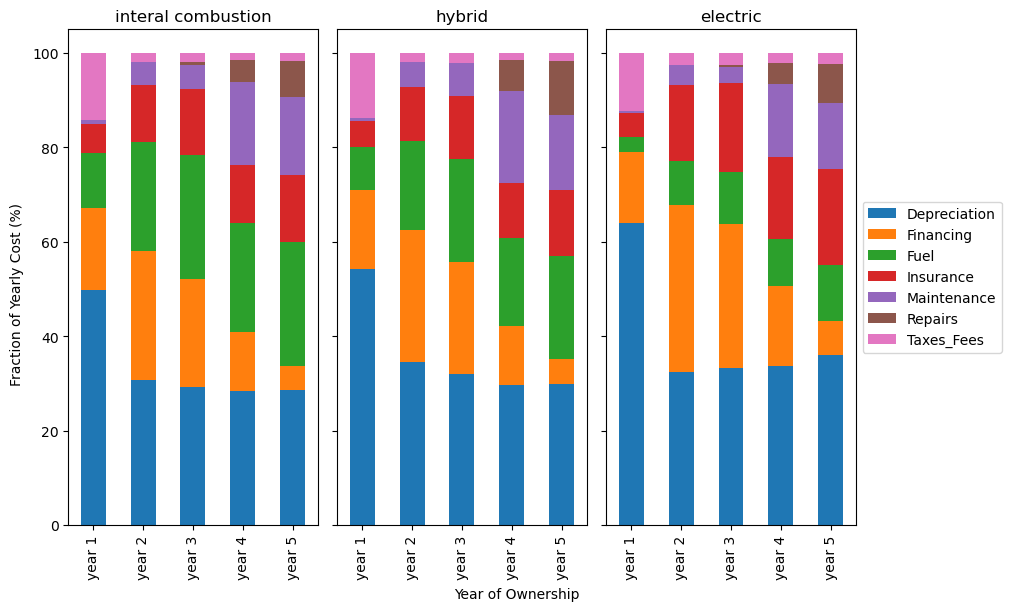

In [21]:
# creating subplots of the percentage of the yearly itemized cost
fig, axes = plt.subplots(nrows=1, ncols=3, sharey=True, figsize = (10, 6))
# filling subplots with stacked bar graphs base on engine type
# internal combustion engine cars
total_ice_cost_plot.plot.bar(stacked=True,ax=axes[0], title='interal combustion',legend=False)
# hybrid cars
total_hybrid_cost_plot.plot.bar(stacked=True,ax=axes[1], title='hybrid', legend=False)
# electric cars
total_ev_cost_plot.plot.bar(stacked=True,ax=axes[2], title='electric').legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
# labeling x- and y-axes
fig.text(0.5,0.0, "Year of Ownership", ha="center", va="center")
fig.text(0.0,0.5, 'Fraction of Yearly Cost (%)', ha="center", va="center", rotation=90)
# triming extra white spacing 
fig.tight_layout()
# updating plot
plt.show()

In [22]:
#saving plot to file
fig.savefig("YearlyPercentageOfCost.pdf")

Analyzing data to determine correlation between the yearly depreciation and the intial cost to by a vehicle based on the engine type

In [23]:
# reset index to row number
ice_hybrid_ev_df.reset_index(inplace=True)
# seting index to info column
ice_hybrid_ev_df=ice_hybrid_ev_df.set_index('info')

In [24]:
# creating new df with only the deperation values
Depreciation_cost_df= ice_hybrid_ev_df.loc[['Depreciation']]
# triming columns to keep only yearly cost, type of car and intial cost of the vehicle
Depreciation_cost_df=Depreciation_cost_df[['cost','year 1','year 2','year 3','year 4','year 5','type']]
# reseting index
Depreciation_cost_df.set_index('type',inplace=True)

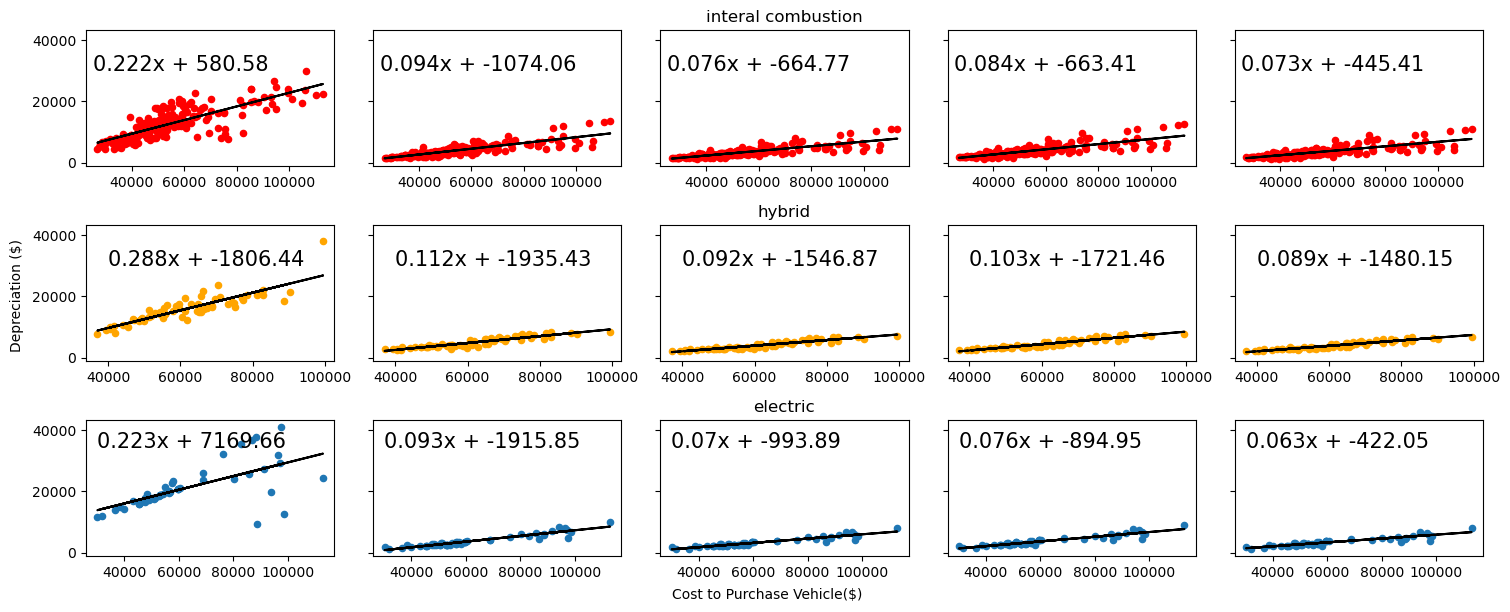

In [25]:
#create dataframe based on engine for depreciation vs cost
ice_Depreciation_cost_df=Depreciation_cost_df.loc['internal combustion']
hybrid_Depreciation_cost_df=Depreciation_cost_df.loc['hybrid']
ev_Depreciation_cost_df=Depreciation_cost_df.loc['electric']

#create figure for subplots
fig, axes= plt.subplots(nrows=3, ncols=5, sharey=True, figsize = (15, 6))

#plotting of internal combustion engines in top row, column = year
ice_Depreciation_cost_df.plot.scatter(x='cost', y='year 1',ax=axes[0,0],c='red',xlabel='',ylabel='')
ice_Depreciation_cost_df.plot.scatter(x='cost', y='year 2',ax=axes[0,1],c='red',xlabel='')
ice_Depreciation_cost_df.plot.scatter(x='cost', y='year 3',ax=axes[0,2],c='red',xlabel='',title='interal combustion')
ice_Depreciation_cost_df.plot.scatter(x='cost', y='year 4',ax=axes[0,3],c='red',xlabel='')
ice_Depreciation_cost_df.plot.scatter(x='cost', y='year 5',ax=axes[0,4],c='red',xlabel='')

#pulling out values to fit with data a linear function
x_values=ice_Depreciation_cost_df['cost']
# creating loop for the years 1-5
for i in range(5):
    # create string for year: adding 1 since year starts at 1 not zero but subplot # starts at 0
    text = 'year '+str(i+1)
    # pulling out depreciation based on year from dataframe
    y_values=ice_Depreciation_cost_df[text]
    #calculating linear regression for year
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    # formating text for fit to plot in subfigure
    line_eq = str(round(slope,3)) + "x + " + str(round(intercept,2))
    # ploting linear regression in same subplot as data being fitted
    axes[0,i].plot(x_values,regress_values,'black')
    # writing function to graph
    axes[0,i].annotate(line_eq,xy=(25000,30000),fontsize=15,color="black")

#plotting of hybrid engines in 2nd row, column = year
hybrid_Depreciation_cost_df.plot.scatter(x='cost', y='year 1',ax=axes[1,0],c='orange',xlabel='',ylabel='')
hybrid_Depreciation_cost_df.plot.scatter(x='cost', y='year 2',ax=axes[1,1],c='orange',xlabel='')
hybrid_Depreciation_cost_df.plot.scatter(x='cost', y='year 3',ax=axes[1,2],c='orange',xlabel='',title='hybrid')
hybrid_Depreciation_cost_df.plot.scatter(x='cost', y='year 4',ax=axes[1,3],c='orange',xlabel='')
hybrid_Depreciation_cost_df.plot.scatter(x='cost', y='year 5',ax=axes[1,4],c='orange',xlabel='')

#pulling out values to fit with data a linear function
x_values = hybrid_Depreciation_cost_df['cost']
# creating loop for the years 1-5
for i in range(5):
    # create string for year: adding 1 since year starts at 1 not zero but subplot # starts at 0
    text = 'year '+str(i+1)
    # pulling out depreciation based on year from dataframe
    y_values=hybrid_Depreciation_cost_df[text]
    #calculating linear regression for year
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    # formating text for fit to plot in subfigure
    line_eq = str(round(slope,3)) + "x + " + str(round(intercept,2))
    # ploting linear regression in same subplot as data being fitted
    axes[1,i].plot(x_values,regress_values,'black')
    # writing function to graph
    axes[1,i].annotate(line_eq,xy=(40000,30000),fontsize=15,color="black")

#plot of electric engines in 3rd row, column = year
ev_Depreciation_cost_df.plot.scatter(x='cost', y='year 1',ax=axes[2,0],xlabel='',ylabel='')
ev_Depreciation_cost_df.plot.scatter(x='cost', y='year 2',ax=axes[2,1],xlabel='')
ev_Depreciation_cost_df.plot.scatter(x='cost', y='year 3',ax=axes[2,2],xlabel='',title='electric')
ev_Depreciation_cost_df.plot.scatter(x='cost', y='year 4',ax=axes[2,3],xlabel='')
ev_Depreciation_cost_df.plot.scatter(x='cost', y='year 5',ax=axes[2,4],xlabel='')

#pulling out values to fit with data a linear function
x_values = ev_Depreciation_cost_df['cost']
# creating loop for the years 1-5
for i in range(5):
    # create string for year: adding 1 since year starts at 1 not zero but subplot # starts at 0
    text = 'year '+str(i+1)
    # pulling out depreciation based on year from dataframe
    y_values=ev_Depreciation_cost_df[text]
    #calculating linear regression for year
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    # formating text for fit to plot in subfigure
    line_eq = str(round(slope,3)) + "x + " + str(round(intercept,2))
    # ploting linear regression in same subplot as data being fitted
    axes[2,i].plot(x_values,regress_values,'black')
    # writing function to graph
    axes[2,i].annotate(line_eq,xy=(30000,34000),fontsize=15,color="black")
# labeling x- and y-axes
fig.text(0.5,0.0, "Cost to Purchase Vehicle($)", ha="center", va="center")
fig.text(0.0,0.5, 'Depreciation ($)', ha="center", va="center", rotation=90)
# triming extra white spacing 
fig.tight_layout()
# updating plot
plt.show()

In [26]:
#saving plot to file
fig.savefig("depreciation.pdf")

In [27]:
# calculating the correlation matrices for each of the engine types for the yearly depreciation vs intial
# cost to purchase the vehicle
display('internal combustion engine cars correlation matrix')
display(ice_Depreciation_cost_df[["cost", "year 1","year 2", "year 3","year 4",'year 5']].corr())
display('hybrid cars correlation matrix')
display(hybrid_Depreciation_cost_df[["cost", "year 1","year 2", "year 3","year 4",'year 5']].corr())
display('electric cars correlation matrix')
display(ev_Depreciation_cost_df[["cost", "year 1","year 2", "year 3","year 4",'year 5']].corr())

'internal combustion engine cars correlation matrix'

,cost,year 1,year 2,year 3,year 4,year 5
cost,1.000000,0.803760,0.835799,0.818368,0.809067,0.787442
year 1,0.803760,1.000000,0.541017,0.498013,0.481389,0.448026
year 2,0.835799,0.541017,1.000000,0.990773,0.983535,0.964676
year 3,0.818368,0.498013,0.990773,1.000000,0.998952,0.991479
year 4,0.809067,0.481389,0.983535,0.998952,1.000000,0.996401
year 5,0.787442,0.448026,0.964676,0.991479,0.996401,1.000000


'hybrid cars correlation matrix'

,cost,year 1,year 2,year 3,year 4,year 5
cost,1.000000,0.862759,0.917844,0.927671,0.930307,0.933963
year 1,0.862759,1.000000,0.695475,0.708103,0.711851,0.718108
year 2,0.917844,0.695475,1.000000,0.998039,0.996459,0.992144
year 3,0.927671,0.708103,0.998039,1.000000,0.999767,0.998028
year 4,0.930307,0.711851,0.996459,0.999767,1.000000,0.999149
year 5,0.933963,0.718108,0.992144,0.998028,0.999149,1.000000


'electric cars correlation matrix'

,cost,year 1,year 2,year 3,year 4,year 5
cost,1.000000,0.654991,0.948017,0.937600,0.931191,0.914765
year 1,0.654991,1.000000,0.510965,0.492714,0.484555,0.466544
year 2,0.948017,0.510965,1.000000,0.994856,0.990313,0.977166
year 3,0.937600,0.492714,0.994856,1.000000,0.999284,0.993663
year 4,0.931191,0.484555,0.990313,0.999284,1.000000,0.997203
year 5,0.914765,0.466544,0.977166,0.993663,0.997203,1.000000
